In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *
%load_ext autoreload

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [2]:
query_dict = {
             'clusters__num_clusters__in': [100, 200, 300],
             'clusters__vectors__algorithm': 'turian',
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled': 'turian',
             'clusters__vectors__unlabelled_percentage': 100,
             'clusters__vectors__use_ppmi': 0,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer'})

Clusters has 3000 values
folds has 3000 values
Composer has 3000 values
score has 3000 values


In [3]:
# scores of the same vectors when used to lookup and replace neighbours instead of via clustering
other_dict = {
            'document_features_ev': 'AN+NN',
            'document_features_tr': 'J+N+AN+NN',
            'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
            'expansions__vectors__algorithm': 'turian',
            'expansions__vectors__composer__in': ['Add', 'Socher'],
            'expansions__vectors__dimensionality': 100,
            'expansions__vectors__rep': 0,
            'expansions__vectors__unlabelled': 'turian',
            'expansions__vectors__unlabelled_percentage': 100,
            'expansions__vectors__use_ppmi': 0,
            'labelled': 'amazon_grouped-tagged'}

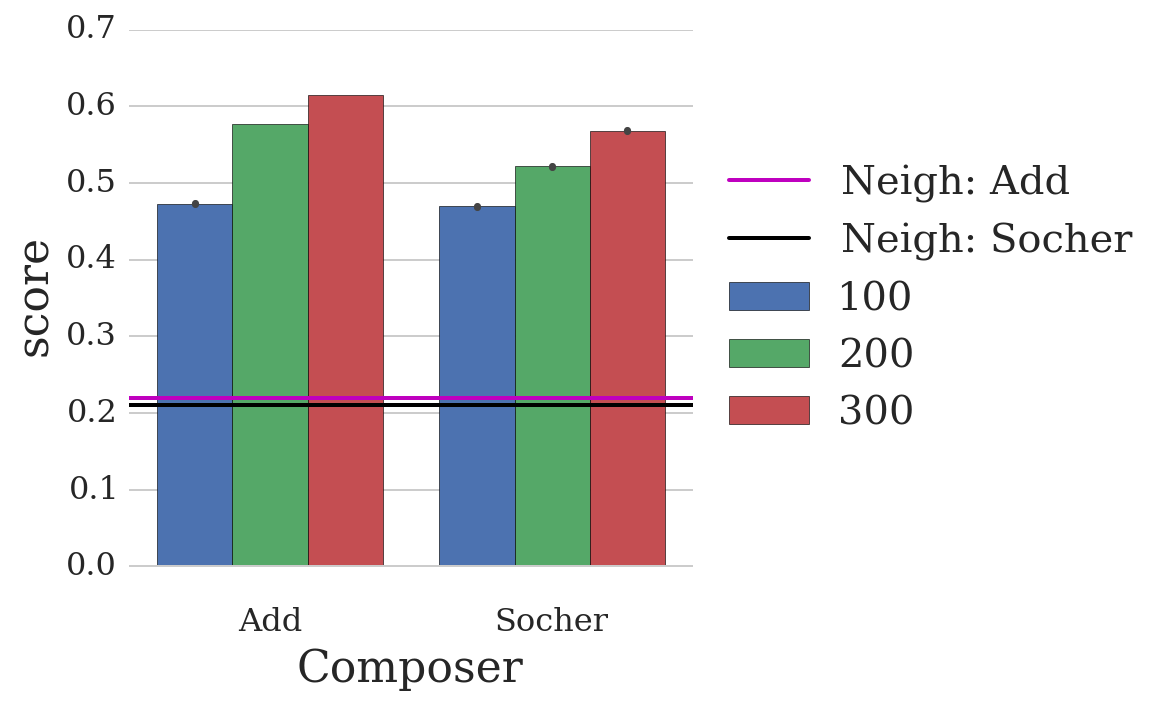

In [4]:
%autoreload
grid = sns.factorplot(hue='Clusters', y='score', data=df, x='Composer',
                      kind='bar', legend=False);
# grid.set_xticklabels(rotation=60);
colors = 'mk'
for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
    plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
               label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
sns.despine(left=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));